In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# import libraries
from IPython.display import Image, display
import numpy as np
import os
from os.path import join
from PIL import ImageFile
import pandas as pd
from matplotlib import cm
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression
import re

In [ ]:
import sys
import os
py_file_location = "/content/anis_koubaa_lib.py"
sys.path.append(os.path.abspath(py_file_location))
import anis_koubaa_lib

In [ ]:
dataset_path="/content/drive/MyDrive/Project(1)/Project_FEI/Case2"
print(os.listdir(dataset_path))

['train', 'test']


In [ ]:
print(dataset_path)
images,labels =anis_koubaa_lib.load_rgb_data(dataset_path,200,shuffle=True)
anis_koubaa_lib.plot_sample_from_dataset(images,labels,rows=7,colums=7,width=20,height=20)

In [ ]:
# import lal images from natural images
train_img_dir = os.path.join(dataset_path ,"train")
train_img_paths = [join(train_img_dir,filename) for filename in os.listdir(train_img_dir)]
# split lals data into train, test, and val
train_img_paths_known, test_img_paths_known = train_test_split(train_img_paths, test_size=0.10, random_state=42)
train_img_paths_known, val_img_paths_known = train_test_split(train_img_paths_known, test_size=0.10, random_state=42)#  import ~lal images
test_img_paths_unknown = []

for d in [d for d in os.listdir(dataset_path) if d!= "train"]:
    test_img_dir_unknown = os.path.join(dataset_path,d)
    test_img_paths_unknown.append([join(test_img_dir_unknown,filename) for filename in os.listdir(test_img_dir_unknown)])
test_img_paths_unknowns = [item for sublist in test_img_paths_unknown for item in sublist]
test_img_paths_unknowns, val_img_paths_unknown = train_test_split(test_img_paths_unknowns, test_size = 0.1, random_state = 15)

In [ ]:
print(len(train_img_paths_known))
print(len(val_img_paths_known))
print(len(test_img_paths_known))
print(len(test_img_paths_unknowns))
print(len(val_img_paths_unknown))

586
66
73
8
1


In [ ]:
def natural_img_dir(image_path):
    path_regex = r"Case2\/(\w*)"
    if 'Case2' in image_path:
        return re.findall(path_regex,image_path,re.MULTILINE)[0].strip()
    else:
        return 'train'

val_img_paths_unknown

['/content/drive/MyDrive/Project(1)/Project_FEI/Case2/test/159-07.jpg']

In [ ]:
natural_img_dir(val_img_paths_unknown)

'train'

In [ ]:
# create test dataframe
all_test_paths = test_img_paths_known+test_img_paths_unknowns
test_path_df = pd.DataFrame({
    'path': all_test_paths,
    'is_known': [1 if path in test_img_paths_known else 0 for path in all_test_paths]
})
test_path_df = shuffle(test_path_df,random_state = 0).reset_index(drop = True)
test_path_df['image_type'] = test_path_df['path'].apply(lambda x: natural_img_dir(x))
all_test_paths = test_path_df['path'].tolist()

print('Distribution of Image Types in Test Set')
print(test_path_df['image_type'].value_counts())
test_path_df.head()

Distribution of Image Types in Test Set
train    73
test      8
Name: image_type, dtype: int64


path  is_known image_type
0  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
1  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
2  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
3  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
4  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train

In [ ]:
# create val dataframe
all_val_paths = val_img_paths_known+val_img_paths_unknown
val_path_df = pd.DataFrame({
    'path': all_val_paths,
    'is_known': [1 if path in val_img_paths_known else 0 for path in all_val_paths]
})
val_path_df = shuffle(val_path_df,random_state = 0).reset_index(drop = True)
val_path_df['image_type'] = val_path_df['path'].apply(lambda x: natural_img_dir(x))
all_val_paths = val_path_df['path'].tolist()

print('Distribution of Image Types in Validation Set')
print(val_path_df['image_type'].value_counts())
#Distribution of Image Types in Valida
val_path_df.head()

Distribution of Image Types in Validation Set
train    66
test      1
Name: image_type, dtype: int64


path  is_known image_type
0  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
1  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
2  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
3  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train
4  /content/drive/MyDrive/Project(1)/Project_FEI/...         1      train

In [ ]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
import time
import os
import numpy as np
from pathlib import Path

In [ ]:
train_images_original_path=train_img_paths_known
print(train_images_original_path[1])
print(len(train_images_original_path))

/content/drive/MyDrive/Project(1)/Project_FEI/Case2/train/hdvdv (149) - Copy.jpg
586


In [ ]:
test_images_original_path=all_test_paths 
print(test_images_original_path[1])
print(len(test_images_original_path))

/content/drive/MyDrive/Project(1)/Project_FEI/Case2/train/hdvdv (98) - Copy.jpg
81


In [ ]:
valid_images_original_path=all_val_paths
print(valid_images_original_path[1])
print(len(valid_images_original_path))

/content/drive/MyDrive/Project(1)/Project_FEI/Case2/train/hdvdv (137).jpg
67


In [ ]:
! pip install Pillow

In [ ]:
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
import warnings,cv2
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

test_data=[]
# load the image
for i in test_images_original_path:
  img_arr = cv2.imread(i)[...,::-1] #convert BGR to RGB format
  resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
  test_data.append(resized_arr)


In [ ]:

vgg_test_labels=test_path_df['is_known'].tolist()
vgg_test_labels = np.array(vgg_test_labels)

np.array(vgg_test_labels).shape

test_data = np.array(test_data).reshape((np.array(test_data).shape[0],224*224*3))
np.array(test_data).shape


(117, 150528)

In [ ]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

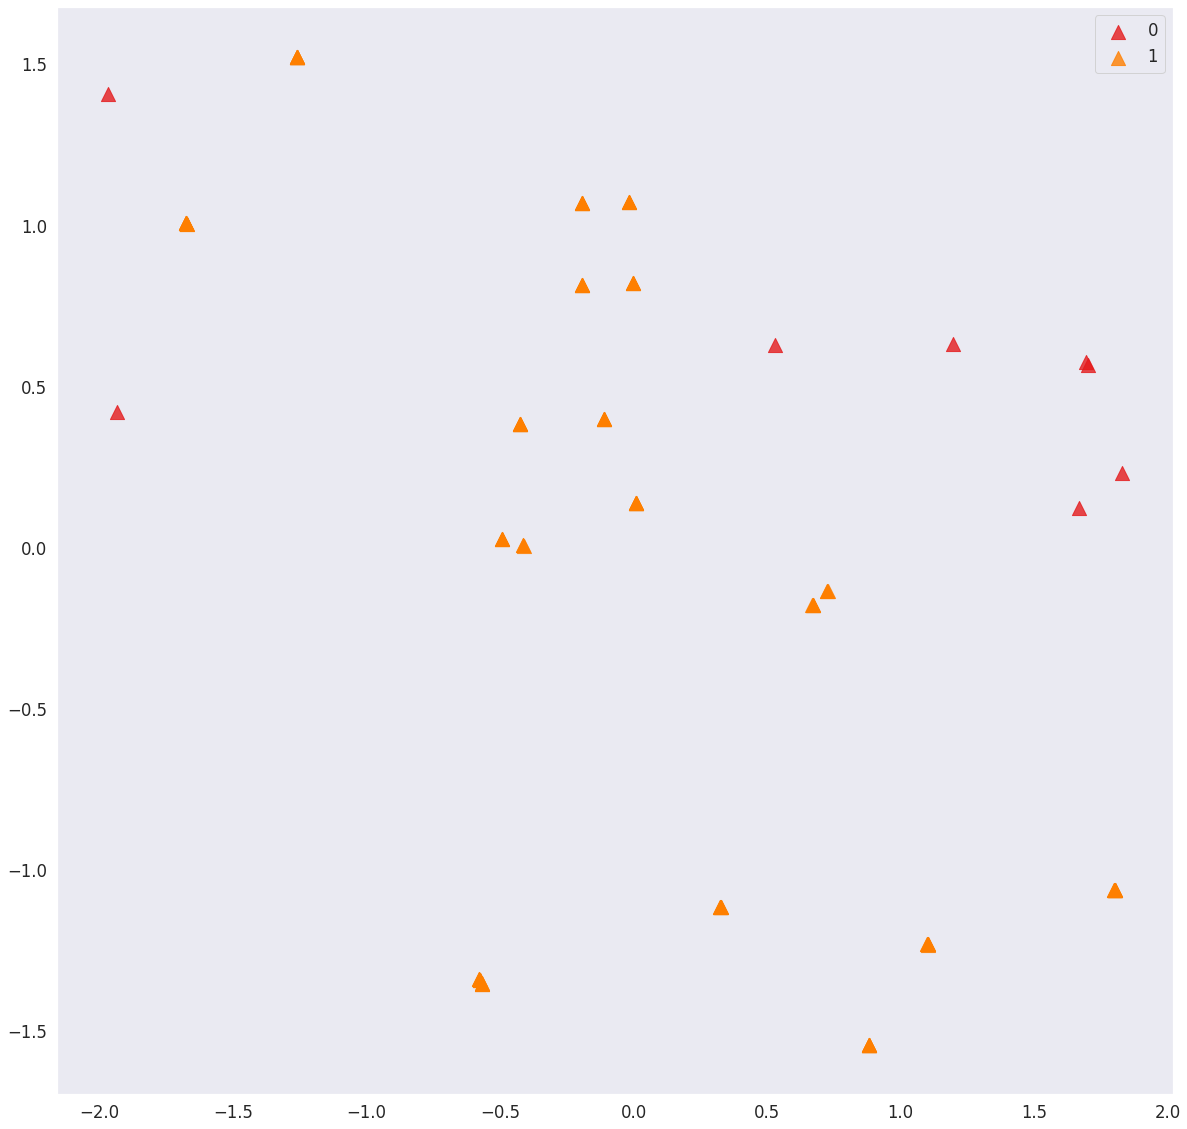

In [ ]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(vgg_test_labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='^',s=200,
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')
visualize_scatter(tsne_result_scaled, vgg_test_labels)


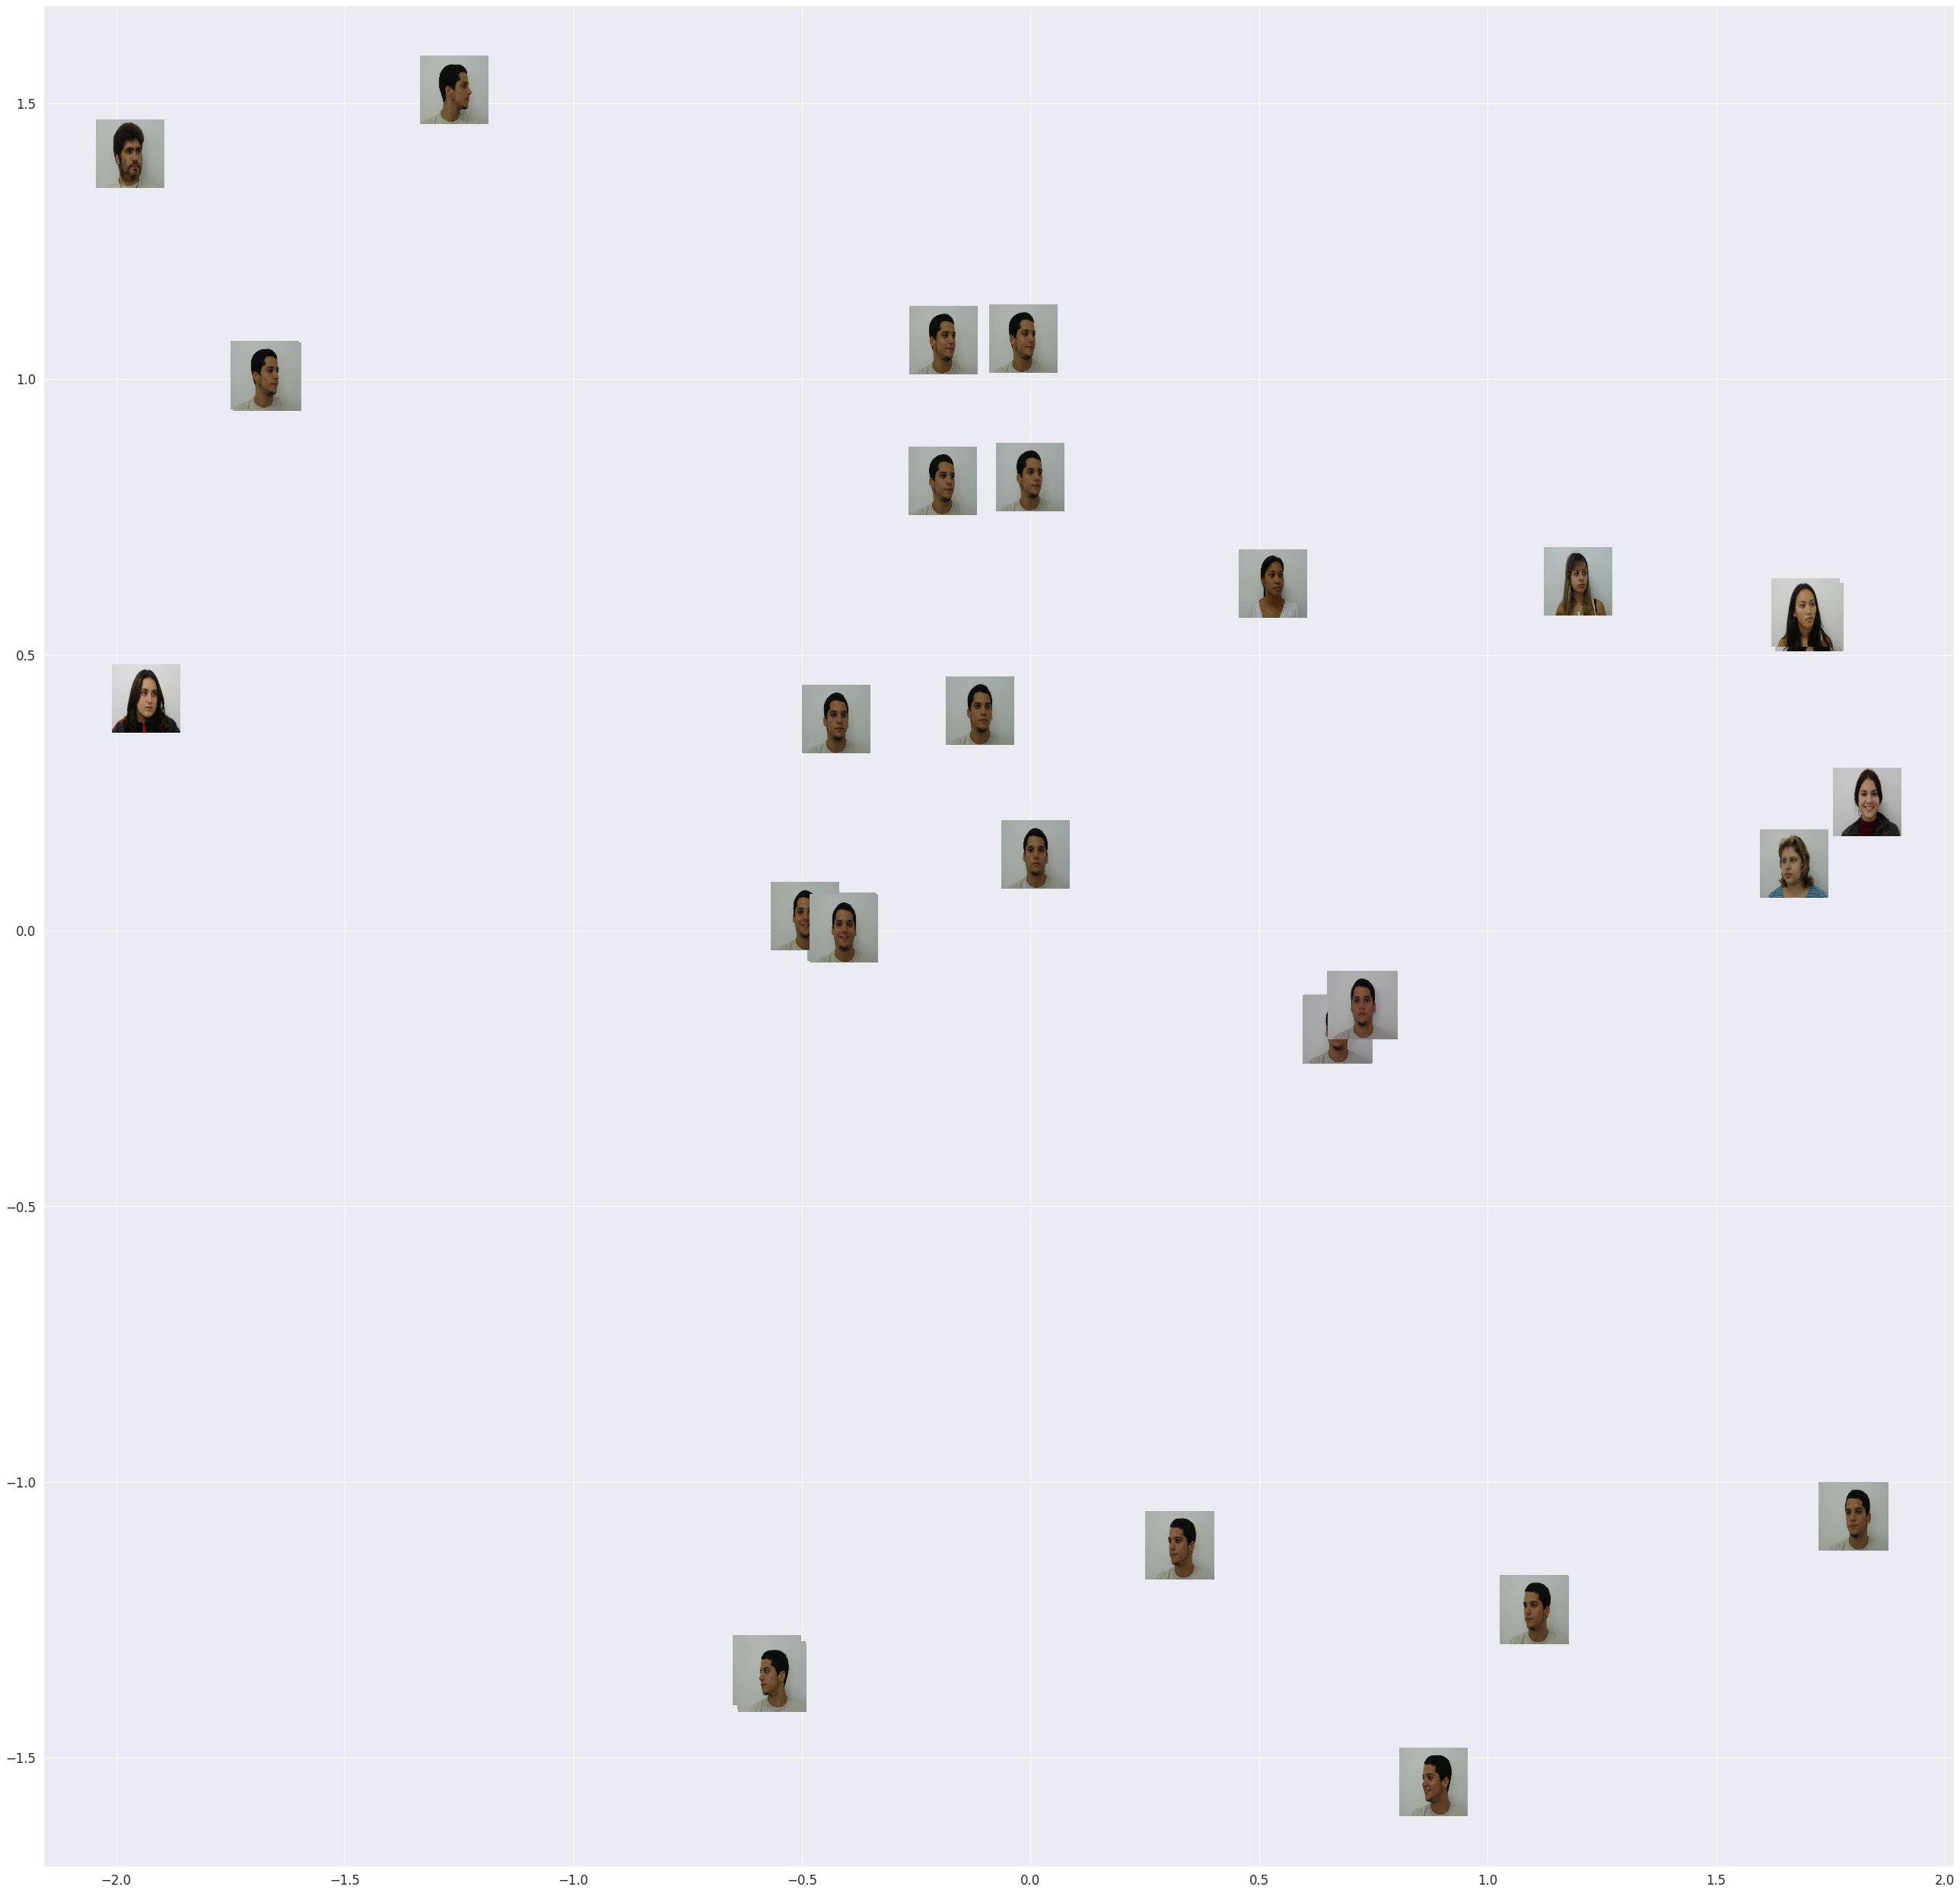

In [ ]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
def visualize_scatter_with_images(X_2d_data, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()
visualize_scatter_with_images(tsne_result_scaled, images = [np.reshape(i, (224,224,3)) for i in test_data], image_zoom=0.4)

In [ ]:
vgg_test_labels=test_path_df['is_known'].tolist()
vgg_test_labels = np.array(vgg_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset=test_data
y_subset = vgg_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

[0 1]
PCA done! Time elapsed: 3.2748873233795166 seconds
Variance explained per principal component: [3.57959460e-01 1.61716083e-01 1.37791432e-01 6.01980433e-02
 4.92811048e-02 3.97470047e-02 3.16952169e-02 2.30424071e-02
 2.00895374e-02 1.84663223e-02 1.81161588e-02 1.44442852e-02
 1.22284434e-02 1.05331147e-02 9.49593906e-03 8.86989122e-03
 8.38645899e-03 7.70101562e-03 4.96496481e-03 4.39490430e-03
 8.78211627e-04 6.28392173e-32 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33 3.57300085e-33 3.57300085e-33
 3.57300085e-33 3.57300085e-33]


(<Figure size 576x576 with 1 Axes>,
 [Text(5106.082348586909, 9446.955901713081, '0'),
  Text(-231.4632448139528, -333.065263526957, '1')])

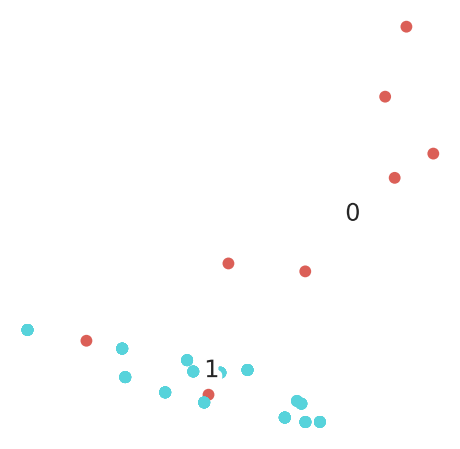

In [ ]:
top_two_comp = pca_df[['pca3','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=10, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

117
t-SNE done! Time elapsed: 1.2937209606170654 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(7.647299, -5.4217815, '0'), Text(3.472321, -7.6551685, '1')])

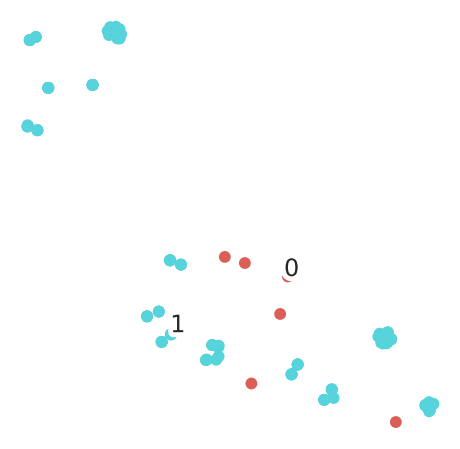

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)

In [ ]:
#vgg16
vgg_train,vgg_val,vgg_test=[],[],[]
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.layers import merge, Input

image_input = Input(shape=(224,224,3))

model = VGG16(include_top=False,weights="imagenet",input_tensor=image_input)

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

VGG16

In [ ]:
valid_batch=[]
for i in valid_images_original_path:
  img = image.load_img(i, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  valid_batch.append(img_data)
valid_batch=np.vstack(valid_batch)
vgg16_val_feature = model.predict(valid_batch,batch_size=12)
vgg_val = vgg16_val_feature.reshape((vgg16_val_feature.shape[0],7*7 * 512))

In [ ]:
train_batch=[]
for i in train_images_original_path:
  img = image.load_img(i, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  train_batch.append(img_data)
train_batch=np.vstack(train_batch)
vgg16_train_feature = model.predict(train_batch,batch_size=12)
vgg_train = vgg16_train_feature.reshape((vgg16_train_feature.shape[0], 7 * 7* 512))

In [ ]:
test_batch=[]
for i in test_images_original_path:
  img = image.load_img(i, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  test_batch.append(img_data)
test_batch=np.vstack(test_batch)
vgg16_test_feature = model.predict(test_batch,batch_size=12)
vgg_test = vgg16_test_feature.reshape((vgg16_test_feature.shape[0], 7 * 7* 512))

In [ ]:
print(len(vgg_train))
print(len(vgg_test))
print(len(vgg_val))

print(np.array(vgg_train).shape)
print(np.array(vgg_test).shape)
print(np.array(vgg_val).shape)

586
81
67
(586, 25088)
(81, 25088)
(67, 25088)


In [ ]:
vgg_test_labels=test_path_df['is_known'].tolist()
vgg_test_labels = np.array(vgg_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = vgg_test[0:20000]
y_subset = vgg_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=20)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

[0 1]
PCA done! Time elapsed: 0.2708261013031006 seconds
Variance explained per principal component: [0.28597832 0.19337611 0.1251529  0.07307548 0.05022601 0.03999
 0.03392838 0.03107591 0.02921326 0.02603343 0.02033658 0.01822957
 0.01649687 0.01418386 0.00970948 0.00960027 0.00844507 0.00672913
 0.00435784 0.0032584 ]


(<Figure size 576x576 with 1 Axes>,
 [Text(-121.87026, -158.16931, '0'), Text(-66.10136, -20.460796, '1')])

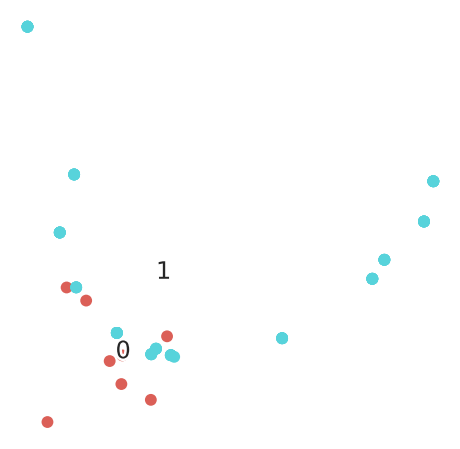

In [ ]:
from sklearn.manifold import TSNE
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

81
t-SNE done! Time elapsed: 0.5669021606445312 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(8.865359, -12.2896595, '0'), Text(0.999957, 0.34698677, '1')])

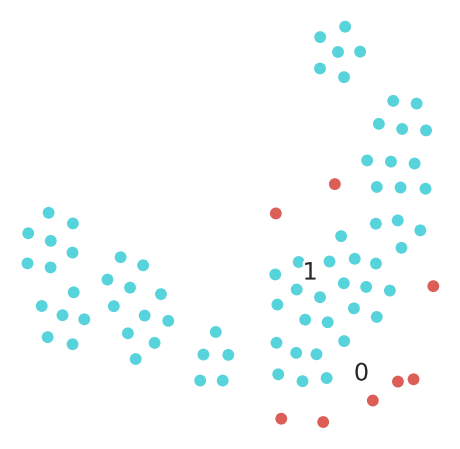

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)

PCA with 50 components done! Time elapsed: 0.26723670959472656 seconds
Cumulative variance explained by 50 principal components: 0.9999999403953552
t-SNE done! Time elapsed: 0.44541049003601074 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-146.74876, 51.52934, '0'), Text(7.7990174, 25.138338, '1')])

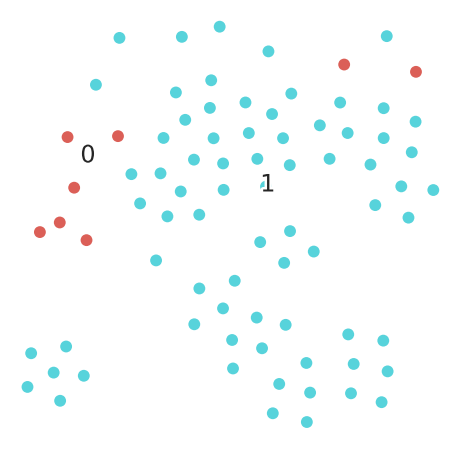

In [ ]:
time_start = time.time()

pca_50 = PCA(n_components=80)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

resnet





inception

In [ ]:
#inception v3
inc3_train,inc3_val,inc3_test=[],[],[]
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
from keras.layers import Conv2D, MaxPooling2D
model = InceptionV3(include_top=False,weights="imagenet",input_shape=(224,224,3))
# summarize the model
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
inc3_train_feature = model.predict(train_batch,batch_size=12)
inc3_train = inc3_train_feature.reshape((inc3_train_feature.shape[0], 5 * 5 * 2048))
inc3_test_feature = model.predict(test_batch,batch_size=12)
inc3_test = inc3_test_feature.reshape((inc3_test_feature.shape[0], 5 * 5 * 2048))
inc3_val_feature = model.predict(valid_batch,batch_size=12)
inc3_val = inc3_val_feature.reshape((inc3_val_feature.shape[0], 5 * 5 * 2048))


In [ ]:
print(len(inc3_train))
print(len(inc3_test))
print(len(inc3_val))

print(np.array(inc3_train).shape)
print(np.array(inc3_test).shape)
print(np.array(inc3_val).shape)

586
81
67
(586, 51200)
(81, 51200)
(67, 51200)


[0 1]
PCA done! Time elapsed: 0.290907621383667 seconds
Variance explained per principal component: [0.25794953 0.20750861 0.10972611 0.08471736 0.07755863 0.03610472
 0.02959438 0.02811587 0.02563945 0.02334302]
81
t-SNE done! Time elapsed: 0.7085423469543457 seconds
PCA with 50 components done! Time elapsed: 0.3631622791290283 seconds
Cumulative variance explained by 50 principal components: 0.8802580237388611
t-SNE done! Time elapsed: 0.45491504669189453 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-10.320295, 31.260426, '0'), Text(15.603736, 2.364868, '1')])

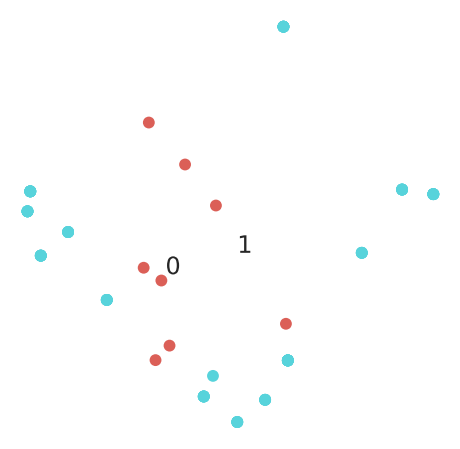

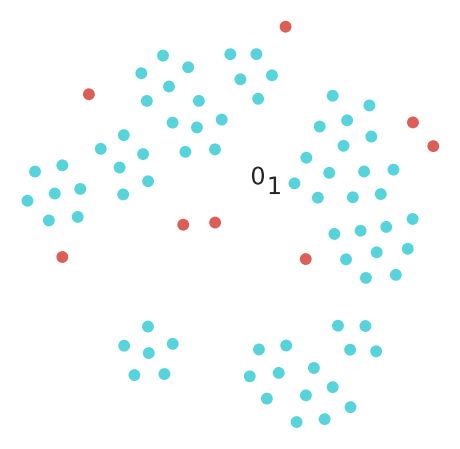

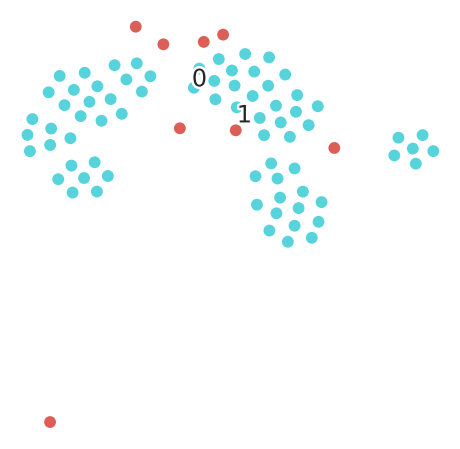

In [ ]:
inc3_test_labels=test_path_df['is_known'].tolist()
inc3_test_labels = np.array(inc3_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = inc3_test[0:20000]
y_subset = inc3_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=10)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=10)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

Xception
.........

In [ ]:
#inception v3
xce_train,xce_val,xce_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications.xception import Xception
# load model
model = Xception(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
xce_train_feature = model.predict(train_batch,batch_size=12)
xce_train = xce_train_feature.reshape((xce_train_feature.shape[0], 7 * 7 * 2048))
xce_test_feature = model.predict(test_batch,batch_size=12)
xce_test = xce_test_feature.reshape((xce_test_feature.shape[0], 7 * 7 * 2048))
xce_val_feature = model.predict(valid_batch,batch_size=12)
xce_val = xce_val_feature.reshape((xce_val_feature.shape[0], 7 * 7 * 2048))


In [ ]:
print(len(xce_train))
print(len(xce_test))
print(len(xce_val))

print(np.array(xce_train).shape)
print(np.array(xce_test).shape)
print(np.array(xce_val).shape)

586
81
67
(586, 100352)
(81, 100352)
(67, 100352)


[0 1]
PCA done! Time elapsed: 0.8696622848510742 seconds
Variance explained per principal component: [0.37990993 0.17738773 0.11629425 0.05380998]
81
t-SNE done! Time elapsed: 0.8490276336669922 seconds
PCA with 50 components done! Time elapsed: 1.0854039192199707 seconds
Cumulative variance explained by 50 principal components: 0.9953247308731079
t-SNE done! Time elapsed: 0.5375618934631348 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(4.368368, -3.1937952, '0'), Text(2.4791446, -0.2696157, '1')])

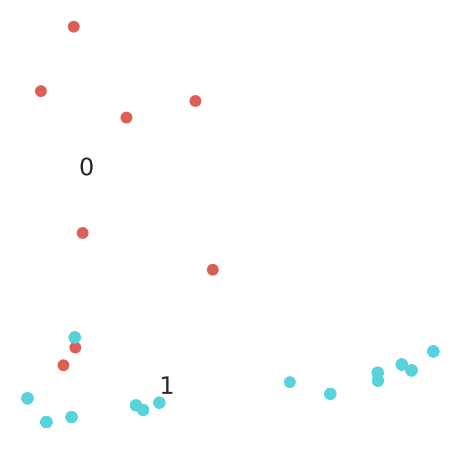

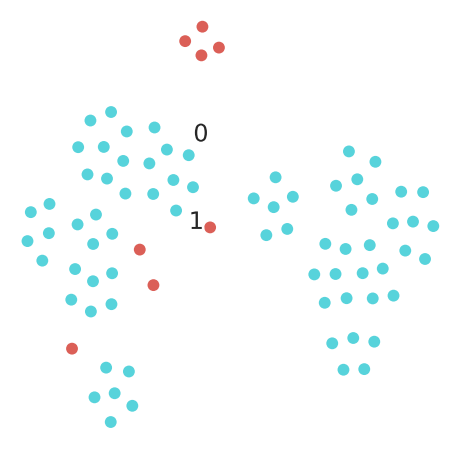

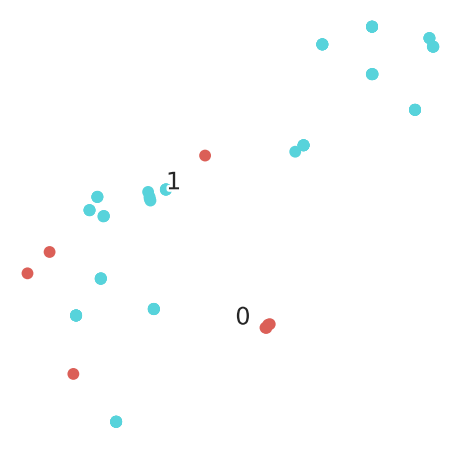

In [ ]:
xce_test_labels=test_path_df['is_known'].tolist()
xce_test_labels = np.array(xce_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = xce_test[0:20000]
y_subset = xce_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=19)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

vgg19

In [ ]:
#inception v3
vgg19_train,vgg19_val,vgg19_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications.vgg19 import VGG19
# load model
model = VGG19(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg19_train_feature = model.predict(train_batch,batch_size=12)
vgg19_train = vgg19_train_feature.reshape((vgg19_train_feature.shape[0], 7 * 7 * 512))
vgg19_test_feature = model.predict(test_batch,batch_size=12)
vgg19_test = vgg19_test_feature.reshape((vgg19_test_feature.shape[0], 7 * 7 * 512))
vgg19_val_feature = model.predict(valid_batch,batch_size=12)
vgg19_val = vgg19_val_feature.reshape((vgg19_val_feature.shape[0], 7 * 7 * 512))


In [ ]:
print(len(vgg19_train))
print(len(vgg19_test))
print(len(vgg19_val))

print(np.array(vgg19_train).shape)
print(np.array(vgg19_test).shape)
print(np.array(vgg19_val).shape)

586
81
67
(586, 25088)
(81, 25088)
(67, 25088)


[0 1]
PCA done! Time elapsed: 0.24507498741149902 seconds
Variance explained per principal component: [0.22132902 0.19358239 0.16560067 0.0723046 ]
81
t-SNE done! Time elapsed: 0.6402802467346191 seconds
PCA with 50 components done! Time elapsed: 0.3199136257171631 seconds
Cumulative variance explained by 50 principal components: 0.9954206943511963
t-SNE done! Time elapsed: 0.5313394069671631 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(13.460224, 68.566376, '0'), Text(6.401591, -5.4297996, '1')])

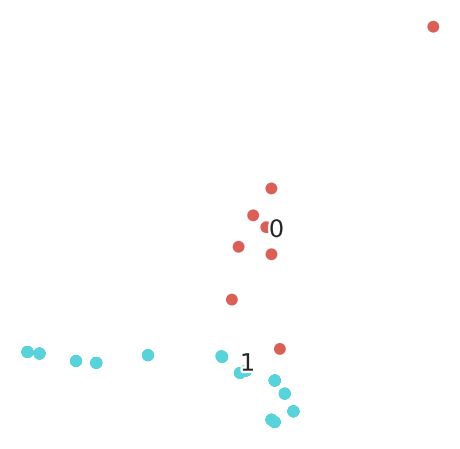

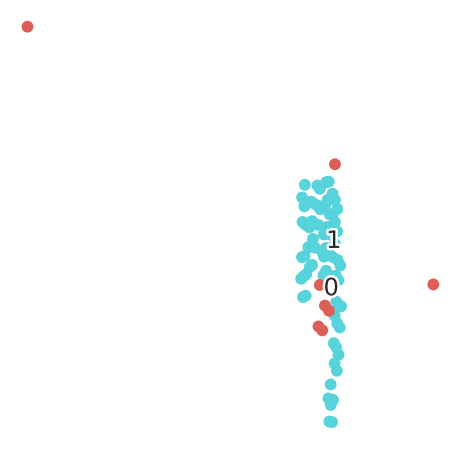

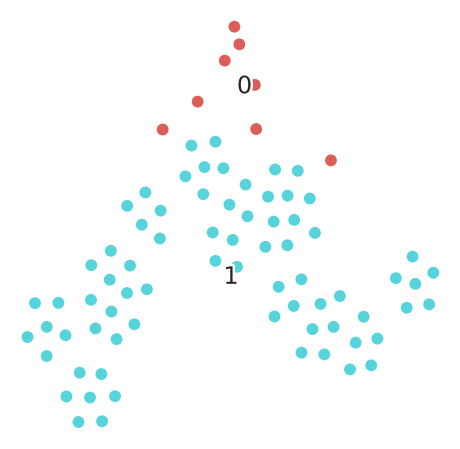

In [ ]:
vgg19_test_labels=test_path_df['is_known'].tolist()
vgg19_test_labels = np.array(vgg19_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = vgg19_test[0:20000]
y_subset = vgg19_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=19)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

resnet50


In [ ]:
#inception v3
res50_train,res50_val,res50_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
res50_train_feature = model.predict(train_batch,batch_size=12)
res50_train = res50_train_feature.reshape((res50_train_feature.shape[0], 7 * 7 * 2048))
res50_test_feature = model.predict(test_batch,batch_size=12)
res50_test = res50_test_feature.reshape((res50_test_feature.shape[0], 7 * 7 * 2048))
res50_val_feature = model.predict(valid_batch,batch_size=12)
res50_val = res50_val_feature.reshape((res50_val_feature.shape[0], 7 * 7 * 2048))


In [ ]:
print(len(res50_train))
print(len(res50_test))
print(len(res50_val))

print(np.array(res50_train).shape)
print(np.array(res50_test).shape)
print(np.array(res50_val).shape)

586
81
67
(586, 100352)
(81, 100352)
(67, 100352)


[0 1]
PCA done! Time elapsed: 1.3259100914001465 seconds
Variance explained per principal component: [2.3073713e-01 1.6482712e-01 1.6189006e-01 6.6147856e-02 4.5417104e-02
 3.9493505e-02 3.6293436e-02 3.2654744e-02 2.9383007e-02 2.9024253e-02
 2.6164003e-02 2.3013169e-02 2.0235151e-02 1.9187042e-02 1.7776959e-02
 1.6385457e-02 1.2074702e-02 1.0538777e-02 8.8236611e-03 8.0633946e-03
 1.8692684e-03 1.2722551e-13 8.1522887e-16 8.1522887e-16 8.1522887e-16
 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16
 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16
 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16
 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16
 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16 8.1522887e-16]
81
t-SNE done! Time elapsed: 0.7869670391082764 seconds
PCA with 50 components done! Time elapsed: 1.6931674480438232 seconds
Cumulative variance explained by 50 principal components: 1.00

(<Figure size 576x576 with 1 Axes>,
 [Text(-56.404884, -7.335186, '0'), Text(-2.2976575, 4.235365, '1')])

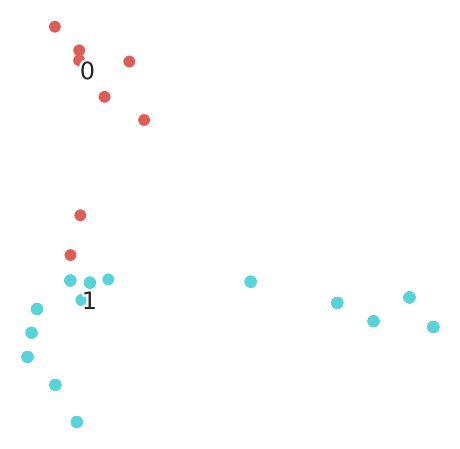

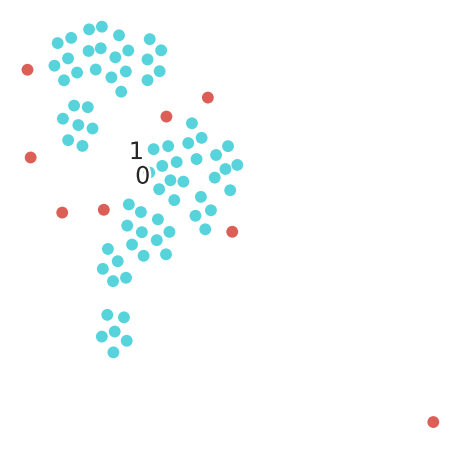

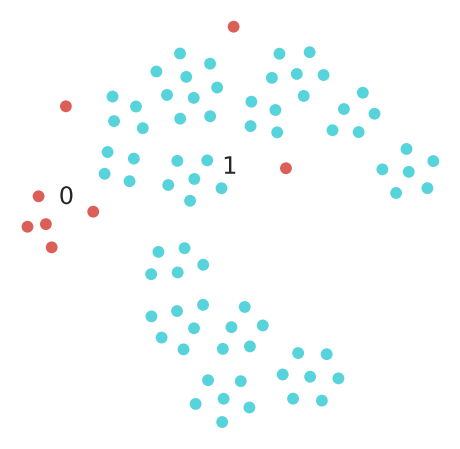

In [ ]:
res50_test_labels=test_path_df['is_known'].tolist()
res50_test_labels = np.array(res50_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = res50_test[0:20000]
y_subset = res50_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

resnet152v2


In [ ]:
#inception v3
res152_train,res152_val,res152_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications import ResNet152V2
# load model
model = ResNet152V2(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

234553344/234545216 [==============================] - 3s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_____________________

In [ ]:
res152_train_feature = model.predict(train_batch,batch_size=12)
res152_train = res152_train_feature.reshape((res152_train_feature.shape[0], 7 * 7 * 2048))
res152_test_feature = model.predict(test_batch,batch_size=12)
res152_test = res152_test_feature.reshape((res152_test_feature.shape[0], 7 * 7 * 2048))
res152_val_feature = model.predict(valid_batch,batch_size=12)
res152_val = res152_val_feature.reshape((res152_val_feature.shape[0], 7 * 7 * 2048))


In [ ]:
print(len(res152_train))
print(len(res152_test))
print(len(res152_val))

print(np.array(res152_train).shape)
print(np.array(res152_test).shape)
print(np.array(res152_val).shape)

586
81
67
(586, 100352)
(81, 100352)
(67, 100352)


[0 1]
PCA done! Time elapsed: 0.8214459419250488 seconds
Variance explained per principal component: [0.4405133  0.31047222 0.13137661 0.02475754]
81
t-SNE done! Time elapsed: 0.7846441268920898 seconds
PCA with 50 components done! Time elapsed: 1.8426916599273682 seconds
Cumulative variance explained by 50 principal components: 0.9999995231628418
t-SNE done! Time elapsed: 0.4790916442871094 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-2.4115255, 1.4550506, '0'), Text(-3.67028, 3.618791, '1')])

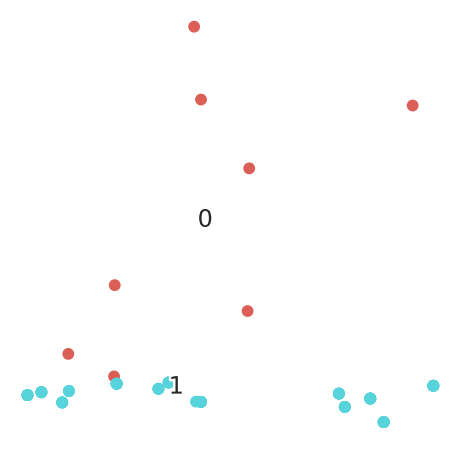

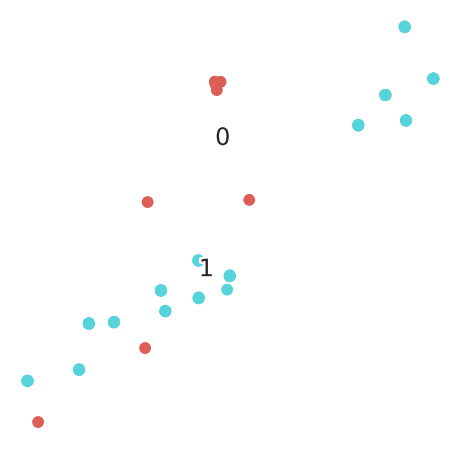

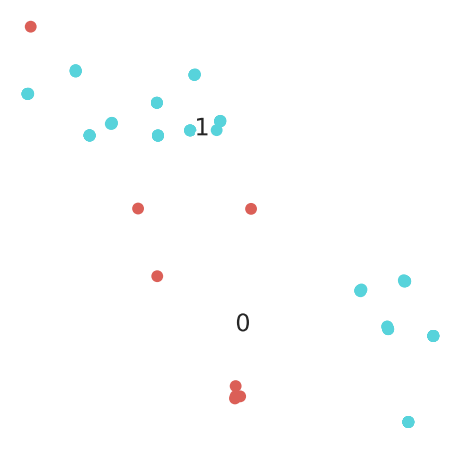

In [ ]:
res152_test_labels=test_path_df['is_known'].tolist()
res152_test_labels = np.array(res152_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = res152_test[0:20000]
y_subset = res152_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

mobilenet

In [ ]:
#inception v3
dense_train,dense_val,dense_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications import DenseNet121
# load model
model = DenseNet121(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

29089792/29084464 [==============================] - 1s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [ ]:
dense_train_feature = model.predict(train_batch,batch_size=12)
dense_train = dense_train_feature.reshape((dense_train_feature.shape[0], 7 * 7 * 1024))
dense_test_feature = model.predict(test_batch,batch_size=12)
dense_test = dense_test_feature.reshape((dense_test_feature.shape[0], 7 * 7 * 1024))
dense_val_feature = model.predict(valid_batch,batch_size=12)
dense_val = dense_val_feature.reshape((dense_val_feature.shape[0], 7 * 7 * 1024))


In [ ]:
print(len(dense_train))
print(len(dense_test))
print(len(dense_val))

print(np.array(dense_train).shape)
print(np.array(dense_test).shape)
print(np.array(dense_val).shape)

586
81
67
(586, 50176)
(81, 50176)
(67, 50176)


[0 1]
PCA done! Time elapsed: 0.41092777252197266 seconds
Variance explained per principal component: [0.3407903  0.22547436 0.13155645 0.04491689]
81
t-SNE done! Time elapsed: 0.6543207168579102 seconds
PCA with 50 components done! Time elapsed: 0.9835183620452881 seconds
Cumulative variance explained by 50 principal components: 0.9999997615814209
t-SNE done! Time elapsed: 0.5269670486450195 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(7.3320045, -52.922142, '0'), Text(2.885017, -5.6503096, '1')])

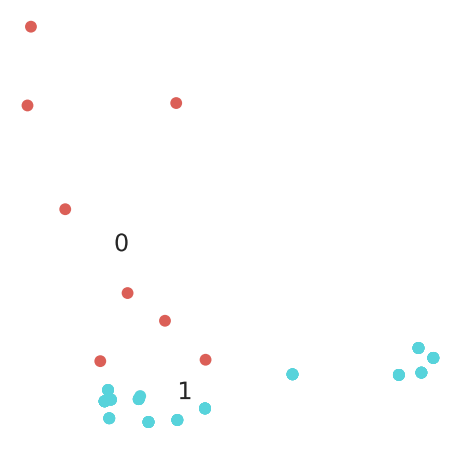

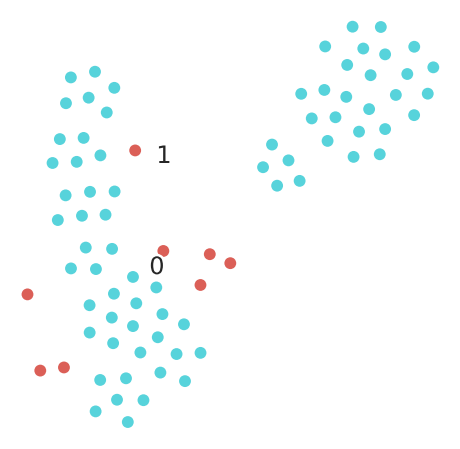

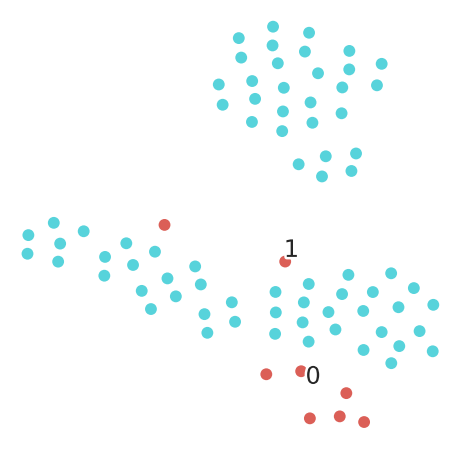

In [ ]:
dense_test_labels=test_path_df['is_known'].tolist()
dense_test_labels = np.array(dense_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = dense_test[0:20000]
y_subset = dense_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

densenet

In [ ]:
#inception v3
nas_train,nas_val,nas_test=[],[],[]
# example of loading the inception v3 modelt
from tensorflow.keras.applications import NASNetLarge
# load model
model = NASNetLarge(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

343613440/343610240 [==============================] - 5s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 96) 0           stem_bn1[0][0]                   
__________________________

In [ ]:
nas_train_feature = model.predict(train_batch,batch_size=12)
nas_train = nas_train_feature.reshape((nas_train_feature.shape[0], 7 * 7 * 4032))
nas_test_feature = model.predict(test_batch,batch_size=12)
nas_test = nas_test_feature.reshape((nas_test_feature.shape[0], 7 * 7 * 4032))
nas_val_feature = model.predict(valid_batch,batch_size=12)
nas_val = nas_val_feature.reshape((nas_val_feature.shape[0], 7 * 7 * 4032))


In [ ]:
print(len(dense_train))
print(len(dense_test))
print(len(dense_val))

print(np.array(dense_train).shape)
print(np.array(dense_test).shape)
print(np.array(dense_val).shape)

586
81
67
(586, 50176)
(81, 50176)
(67, 50176)


[0 1]
PCA done! Time elapsed: 3.097635269165039 seconds
Variance explained per principal component: [6.58086658e-01 1.47967219e-01 6.89232945e-02 2.73851696e-02
 1.78660471e-02 1.53400935e-02 1.39104212e-02 9.48693790e-03
 7.65849929e-03 7.03144027e-03 6.09455863e-03 5.17413812e-03
 3.61853163e-03 3.01586441e-03 2.66419910e-03 2.11596442e-03
 1.34249707e-03 1.06482324e-03 6.33457385e-04 5.16951142e-04
 1.02894657e-04 3.89719486e-14 9.21959195e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15 2.33799347e-15 2.33799347e-15
 2.33799347e-15 2.33799347e-15]
81
t-SNE done! Time elapsed: 1.0520813465118408 seconds
PCA with 50 components done! Time elapsed: 3.1488218307495117 seconds
Cumulative

(<Figure size 576x576 with 1 Axes>,
 [Text(16.881508, -63.57555, '0'), Text(-2.45188, 2.1052701, '1')])

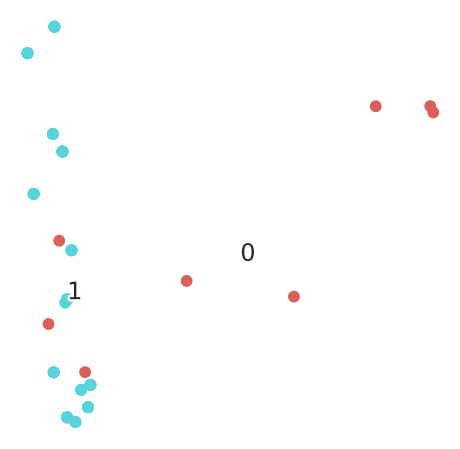

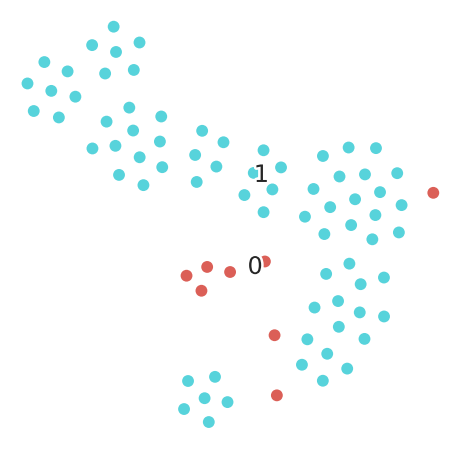

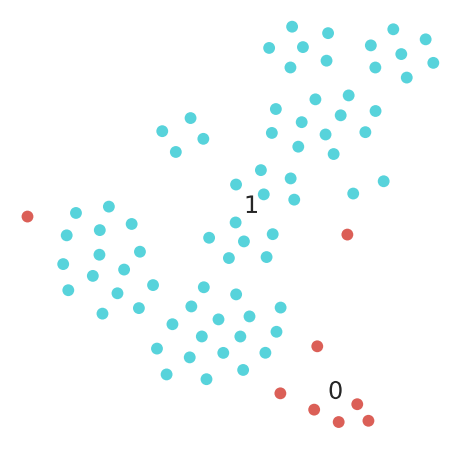

In [ ]:
nas_test_labels=test_path_df['is_known'].tolist()
nas_test_labels = np.array(nas_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = nas_test[0:20000]
y_subset = nas_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

effecientnet

In [ ]:
#inception v3
res152_train,res152_val,res152_test=[],[],[]
# example of loading the inception v3 modelt
from keras.applications import ResNet152V2
# load model
model = ResNet152V2(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
res152_train_feature = model.predict(train_batch,batch_size=12)
res152_train = res152_train_feature.reshape((res152_train_feature.shape[0], 7 * 7 * 2048))
res152_test_feature = model.predict(test_batch,batch_size=12)
res152_test = res152_test_feature.reshape((res152_test_feature.shape[0], 7 * 7 * 2048))
res152_val_feature = model.predict(valid_batch,batch_size=12)
res152_val = res152_val_feature.reshape((res152_val_feature.shape[0], 7 * 7 * 2048))


In [ ]:
print(len(res152_train))
print(len(res152_test))
print(len(res152_val))

print(np.array(res152_train).shape)
print(np.array(res152_test).shape)
print(np.array(res152_val).shape)

586
81
67
(586, 100352)
(81, 100352)
(67, 100352)


Nasnetlarge

In [ ]:
#inception v3
eff_train,eff_val,eff_test=[],[],[]
# example of loading the inception v3 mode
from tensorflow.keras.applications import EfficientNetB7
#from keras.applications import EfficientNetB7
# load model
model = EfficientNetB7(include_top=False,weights="imagenet",input_tensor=image_input)
# summarize the model
model.summary()

258080768/258076736 [==============================] - 2s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
__________________

In [ ]:
eff_train_feature = model.predict(train_batch,batch_size=12)
eff_train = eff_train_feature.reshape((eff_train_feature.shape[0], 7 * 7 * 2560))
eff_test_feature = model.predict(test_batch,batch_size=12)
eff_test = eff_test_feature.reshape((eff_test_feature.shape[0], 7 * 7 * 2560))
eff_val_feature = model.predict(valid_batch,batch_size=12)
eff_val = eff_val_feature.reshape((eff_val_feature.shape[0], 7 * 7 * 2560))


In [ ]:
print(len(eff_train))
print(len(eff_test))
print(len(eff_val))

print(np.array(eff_train).shape)
print(np.array(eff_test).shape)
print(np.array(eff_val).shape)

586
81
67
(586, 125440)
(81, 125440)
(67, 125440)


[0 1]
PCA done! Time elapsed: 0.9243330955505371 seconds
Variance explained per principal component: [0.3136048  0.16792692 0.12823927 0.05906918]
81
t-SNE done! Time elapsed: 0.9614274501800537 seconds
PCA with 50 components done! Time elapsed: 2.2313125133514404 seconds
Cumulative variance explained by 50 principal components: 0.9999999403953552
t-SNE done! Time elapsed: 0.5194950103759766 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(11.61456, -19.463793, '0'), Text(-21.592596, -6.0954137, '1')])

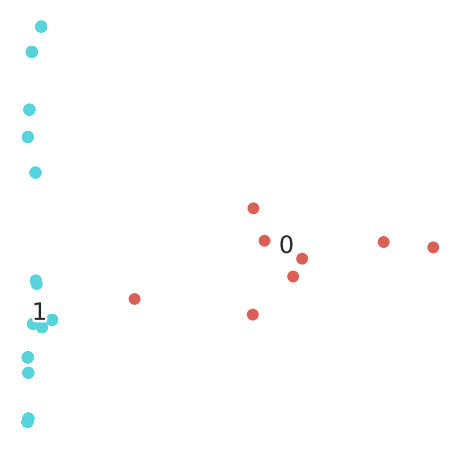

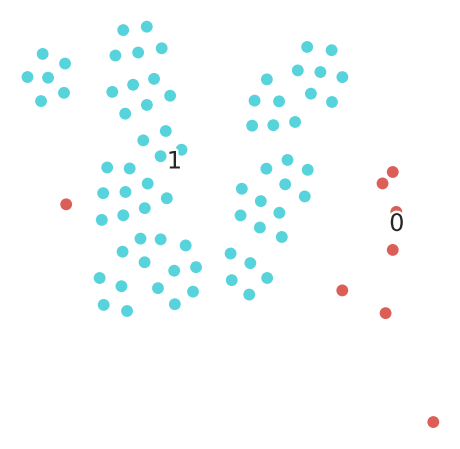

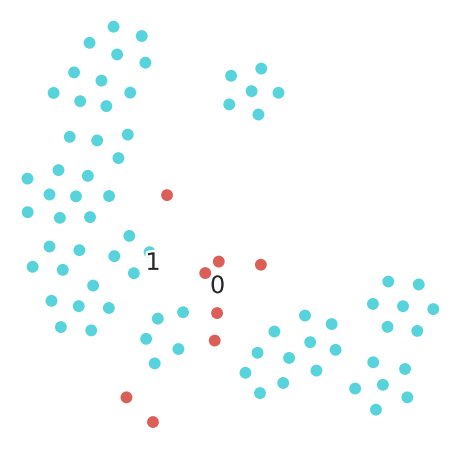

In [ ]:
eff_test_labels=test_path_df['is_known'].tolist()
eff_test_labels = np.array(eff_test_labels)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
x_subset = eff_test[0:20000]
y_subset = eff_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

In [ ]:
! sudo pip install git+https://github.com/rcmalli/keras-vggface.git
! pip show keras-vggface

In [ ]:

import theano
!pip install Keras-Applications
print(theano.__version__)

# example of creating a face embedding
from keras_vggface.vggface import VGGFace
# create a vggface2 model
# check version of keras_vggface

# Convolution Features
model= VGGFace(model='resnet50',include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max
model.summary()

     |████████████████████████████████| 51kB 2.0MB/s 
1.0.5
94699520/94694792 [==============================] - 1s 0us/step
Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_3[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_354 (Activation)     (None, 112, 112, 64) 0   

In [ ]:

import theano
!pip install Keras-Applications
print(theano.__version__)
# Convolution Features
model= VGGFace(model='vgg16',include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max
model.summary()

1.0.5
58916864/58909280 [==============================] - 1s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
________________________________________________

In [ ]:
# a VGGFace1 model via model=’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘.
import theano
!pip install Keras-Applications
print(theano.__version__)
# Convolution Features
model= VGGFace(model='senet50',include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max
model.summary()

1.0.5
104947712/104944616 [==============================] - 2s 0us/step
Model: "vggface_senet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_5[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_403 (Activation)     (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________

In [ ]:

vggface50_train_feature = model.predict(train_batch,batch_size=12)
#vggface50_train = vggface50_train_feature.reshape((vggface50_train_feature.shape[0], 1*1* 512))
vggface50_test_feature = model.predict(test_batch,batch_size=12)
#vggface50_test = vggface50_test_feature.reshape((vggface50_test_feature.shape[0], 1*1* 512))
vggface50_val_feature = model.predict(valid_batch,batch_size=12)
#vggface50_val = vggface50_val_feature.reshape((vggface50_val_feature.shape[0], 1*1* 512))

vggface16_train_feature = model.predict(train_batch,batch_size=12)
#vggface16_train = vggface16_train_feature.reshape((vggface16_train_feature.shape[0], 1*1* 2048))
vggface16_test_feature = model.predict(test_batch,batch_size=12)
#vggface16_test = vggface16_test_feature.reshape((vggface16_test_feature.shape[0], 1*1* 2048))
vggface16_val_feature = model.predict(valid_batch,batch_size=12)
#vggface16_val = vggface16_val_feature.reshape((vggface16_val_feature.shape[0],1*1* 2048))



vggfaces50_train_feature = model.predict(train_batch,batch_size=12)
#vggfaces50_train = vggfaces50_train_feature.reshape((vggfaces50_train_feature.shape[0], 1*1* 2048))
vggfaces50_test_feature = model.predict(test_batch,batch_size=12)
#vggfaces50_test = vggfaces50_test_feature.reshape((vggfaces50_test_feature.shape[0], 1*1* 2048))
vggfaces50_val_feature = model.predict(valid_batch,batch_size=12)
#vggfaces50_val = vggfaces50_val_feature.reshape((vggfaces50_val_feature.shape[0], 1*1* 2048))


In [ ]:
vggface50_train_feature.shape

(586, 2048)

In [ ]:
print(len(vggface50_train_feature))
print(len(vggface50_test_feature))
print(len(vggface50_val_feature))
print(np.array(vggface50_train_feature).shape)
print(np.array(vggface50_test_feature).shape)
print(np.array(vggface50_val_feature).shape)

print(len(vggface16_train_feature))
print(len(vggface16_test_feature))
print(len(vggface16_val_feature))
print(np.array(vggface16_train_feature).shape)
print(np.array(vggface16_test_feature).shape)
print(np.array(vggface16_val_feature).shape)

print(len(vggfaces50_train_feature))
print(len(vggfaces50_test_feature))
print(len(vggfaces50_val_feature))
print(np.array(vggfaces50_train_feature).shape)
print(np.array(vggfaces50_test_feature).shape)
print(np.array(vggfaces50_val_feature).shape)

586
81
67
(586, 2048)
(81, 2048)
(67, 2048)
586
81
67
(586, 2048)
(81, 2048)
(67, 2048)
586
81
67
(586, 2048)
(81, 2048)
(67, 2048)


[0 1]
PCA done! Time elapsed: 0.031648874282836914 seconds
Variance explained per principal component: [0.31148303 0.16796899 0.09695852 0.08371797]
81
t-SNE done! Time elapsed: 0.5338039398193359 seconds
PCA with 50 components done! Time elapsed: 0.046813249588012695 seconds
Cumulative variance explained by 50 principal components: 0.5764102339744568
t-SNE done! Time elapsed: 0.49196863174438477 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-61.194435, 91.81416, '0'), Text(-3.7723646, -24.569445, '1')])

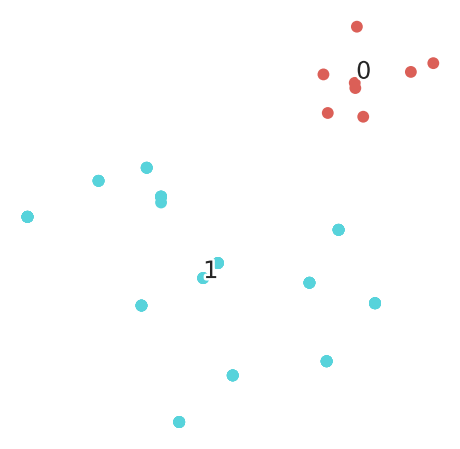

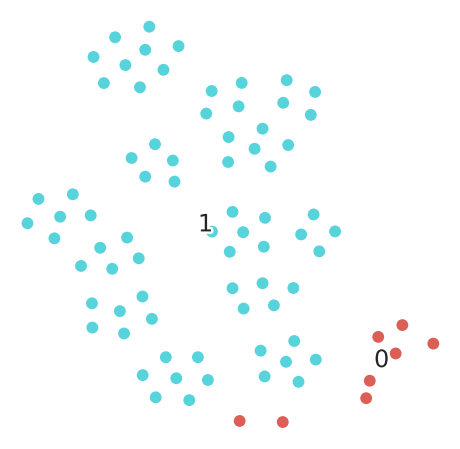

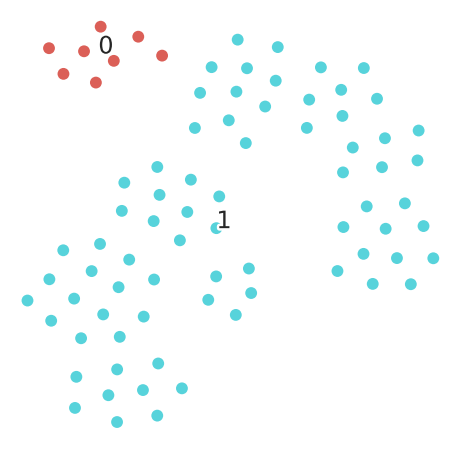

In [ ]:
''' vggface50_test_labels=test_path_df['is_known'].tolist()
vggface50_test_labels = np.array(vggface50_test_labels)

vggface16_test_labels=test_path_df['is_known'].tolist()
vggface16_test_labels = np.array(vggface16_test_labels)
'''
vggfaces50_test_labels=test_path_df['is_known'].tolist()
vggfaces50_test_labels = np.array(vggfaces50_test_labels)


import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

'''
x_subset = vggface50_test_feature[0:20000]
y_subset = vggface50_test_labels[0:20000]
x_subset = vggface16_test_feature[0:20000]
y_subset = vggface16_test_labels[0:20000]

'''
x_subset = vggfaces50_test_feature[0:20000]
y_subset = vggfaces50_test_labels[0:20000]

print (np.unique(y_subset))
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print( 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print( 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=140, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(len(x_subset))
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_subset)
time_start = time.time()

pca_50 = PCA(n_components=3)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_pca_tsne, y_subset)

In [ ]:
# Apply standard scaler to output from resnet50
'''#vgg16
ss = StandardScaler()
ss.fit(vgg_train)
X_train = ss.transform(vgg_train)
X_test = ss.transform(vgg_test)
X_val = ss.transform(vgg_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=50, whiten=True)
pca = pca.fit(vgg_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(vgg_train)
X_test = pca.transform(vgg_test)
X_val = pca.transform(vgg_val)

#InceptionV3
ss = StandardScaler()
ss.fit(inc3_train)
X_train = ss.transform(inc3_train)
X_test = ss.transform(inc3_test)
X_val = ss.transform(inc3_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(inc3_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(inc3_train)
X_test = pca.transform(inc3_test)
X_val = pca.transform(inc3_val)

#Xception
ss = StandardScaler()
ss.fit(xce_train)
X_train = ss.transform(xce_train)
X_test = ss.transform(xce_test)
X_val = ss.transform(xce_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(xce_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(xce_train)
X_test = pca.transform(xce_test)
X_val = pca.transform(xce_val)
'''
'''#VGG19
ss = StandardScaler()
ss.fit(vgg19_train)
X_train = ss.transform(vgg19_train)
X_test = ss.transform(vgg19_test)
X_val = ss.transform(vgg19_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(vgg19_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(vgg19_train)
X_test = pca.transform(vgg19_test)
X_val = pca.transform(vgg19_val)


#ResNet50
ss = StandardScaler()
ss.fit(res50_train)
X_train = ss.transform(res50_train)
X_test = ss.transform(res50_test)
X_val = ss.transform(res50_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(res50_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(res50_train)
X_test = pca.transform(res50_test)
X_val = pca.transform(res50_val)
'''
'''
#ResNet152
ss = StandardScaler()
ss.fit(res152_train)
X_train = ss.transform(res152_train)
X_test = ss.transform(res152_test)
X_val = ss.transform(res152_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(res152_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(res152_train)
X_test = pca.transform(res152_test)
X_val = pca.transform(res152_val)
'''
'''
#DenseNet
ss = StandardScaler()
ss.fit(dense_train)
X_train = ss.transform(dense_train)
X_test = ss.transform(dense_test)
X_val = ss.transform(dense_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(dense_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(dense_train)
X_test = pca.transform(dense_test)
X_val = pca.transform(dense_val)
'''

'''#DenseNet
ss = StandardScaler()
ss.fit(dense_train)
X_train = ss.transform(dense_train)
X_test = ss.transform(dense_test)
X_val = ss.transform(dense_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(dense_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(dense_train)
X_test = pca.transform(dense_test)
X_val = pca.transform(dense_val)'''


'''#DenseNet
ss = StandardScaler()
ss.fit(dense_train)
X_train = ss.transform(dense_train)
X_test = ss.transform(dense_test)
X_val = ss.transform(dense_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(dense_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(dense_train)
X_test = pca.transform(dense_test)
X_val = pca.transform(dense_val)'''


'''#NasNet
ss = StandardScaler()
ss.fit(nas_train)
X_train = ss.transform(nas_train)
X_test = ss.transform(nas_test)
X_val = ss.transform(nas_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(nas_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(nas_train)
X_test = pca.transform(nas_test)
X_val = pca.transform(nas_val)'''
'''

#EfficientNet
ss = StandardScaler()
ss.fit(eff_train)
X_train = ss.transform(eff_train)
X_test = ss.transform(eff_test)
X_val = ss.transform(eff_val)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(eff_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(eff_train)
X_test = pca.transform(eff_test)
X_val = pca.transform(eff_val)

'''
'''

#VGGFace resnet50
ss = StandardScaler()
ss.fit(vggface50_train_feature)
X_train = ss.transform(vggface50_train_feature)
X_test = ss.transform(vggface50_test_feature)
X_val = ss.transform(vggface50_val_feature)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=50, whiten=True)
pca = pca.fit(vggface50_train_feature)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(vggface50_train_feature)
X_test = pca.transform(vggface50_test_feature)
X_val = pca.transform(vggface50_val_feature)
'''
'''
#VGGFace vgg16
ss = StandardScaler()
ss.fit(vggface16_train_feature)
X_train = ss.transform(vggface16_train_feature)
X_test = ss.transform(vggface16_test_feature)
X_val = ss.transform(vggface16_val_feature)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=50, whiten=True)
pca = pca.fit(vggface16_train_feature)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(vggface16_train_feature)
X_test = pca.transform(vggface16_test_feature)
X_val = pca.transform(vggface16_val_feature)
'''



#VGGFace senet50
ss = StandardScaler()
ss.fit(vggfaces50_train_feature)
X_train = ss.transform(vggfaces50_train_feature)
X_test = ss.transform(vggfaces50_test_feature)
X_val = ss.transform(vggfaces50_val_feature)
# Take PCA to reduce feature space dimensionality
pca = PCA(n_components=6, whiten=True)
pca = pca.fit(vggfaces50_train_feature)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))
X_train = pca.transform(vggfaces50_train_feature)
X_test = pca.transform(vggfaces50_test_feature)
X_val = pca.transform(vggfaces50_val_feature)






Explained variance percentage = 0.87


In [ ]:
# Train classifier and obtain predictions for OC-SVM

time_start = time.time()

'''#VGG16
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(vgg_train)
if_clf.fit(vgg_train)

oc_svm_preds = oc_svm_clf.predict(vgg_test)
if_preds = if_clf.predict(vgg_test)


#InceptionV3
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(inc3_train)
if_clf.fit(inc3_train)

oc_svm_preds = oc_svm_clf.predict(inc3_test)
if_preds = if_clf.predict(inc3_test)

#Xception
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(xce_train)
if_clf.fit(xce_train)

oc_svm_preds = oc_svm_clf.predict(xce_test)
if_preds = if_clf.predict(xce_test)


#VGG19
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(vgg19_train)
if_clf.fit(vgg19_train)

oc_svm_preds = oc_svm_clf.predict(vgg19_test)
if_preds = if_clf.predict(vgg19_test)

#Resnet50
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(res50_train)
if_clf.fit(res50_train)

oc_svm_preds = oc_svm_clf.predict(res50_test)
if_preds = if_clf.predict(res50_test)

'''
'''
#ResNet152
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(res152_train)
if_clf.fit(res152_train)

oc_svm_preds = oc_svm_clf.predict(res152_test)
if_preds = if_clf.predict(res152_test)'''
'''
#DenseNet
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(dense_train)
if_clf.fit(dense_train)

oc_svm_preds = oc_svm_clf.predict(dense_test)
if_preds = if_clf.predict(dense_test)


'''
'''
#Nasnet
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(nas_train)
if_clf.fit(nas_train)

oc_svm_preds = oc_svm_clf.predict(nas_test)
if_preds = if_clf.predict(nas_test)
'''

'''
#EfficientNet
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(eff_train)
if_clf.fit(eff_train)

oc_svm_preds = oc_svm_clf.predict(eff_test)
if_preds = if_clf.predict(eff_test)

'''

#vggface resnet50
oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='linear', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.8, max_features=1.0, max_samples=1.0, n_estimators=100)  # Obtained using grid search

oc_svm_clf.fit(vggfaces50_train_feature)
if_clf.fit(vggfaces50_train_feature)

oc_svm_preds = oc_svm_clf.predict(vggfaces50_test_feature)
if_preds = if_clf.predict(vggfaces50_test_feature)
print(time.time()-time_start)


2.156052827835083


In [ ]:
  svm_if_results=pd.DataFrame({
  'path': all_test_paths,
  'oc_svm_preds': [0 if x == -1 else 1 for x in oc_svm_preds],
  'if_preds': [0 if x == -1 else 1 for x in if_preds]
})


svm_if_results=svm_if_results.merge(test_path_df)
svm_if_results.head()

path  ...  image_type
0  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
1  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
2  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
3  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
4  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train

[5 rows x 5 columns]

roc auc score: if_preds
0.5753424657534246
              precision    recall  f1-score   support

           0       0.11      1.00      0.21         8
           1       1.00      0.15      0.26        73

    accuracy                           0.23        81
   macro avg       0.56      0.58      0.23        81
weighted avg       0.91      0.23      0.26        81



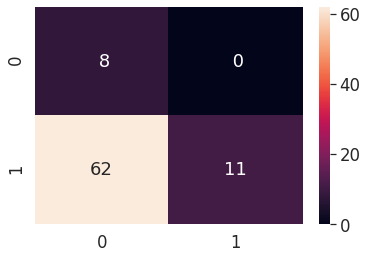

In [ ]:
print('roc auc score: if_preds')
if_preds=svm_if_results['if_preds']
actual=svm_if_results['is_known']
print(roc_auc_score(actual, if_preds))
print(classification_report(actual, if_preds))
sns.heatmap(confusion_matrix(actual, if_preds),annot=True,fmt='2.0f')
plt.show()

roc auc score: oc_svm_preds
0.8210616438356164
              precision    recall  f1-score   support

           0       0.29      0.88      0.44         8
           1       0.98      0.77      0.86        73

    accuracy                           0.78        81
   macro avg       0.64      0.82      0.65        81
weighted avg       0.91      0.78      0.82        81



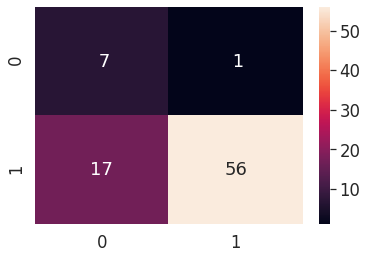

In [ ]:
print('roc auc score: oc_svm_preds')
oc_svm_preds=svm_if_results['oc_svm_preds']
actual=svm_if_results['is_known']
print(roc_auc_score(actual, oc_svm_preds))
print(classification_report(actual, oc_svm_preds))
sns.heatmap(confusion_matrix(actual, oc_svm_preds),annot=True,fmt='2.0f')
plt.show()

In [ ]:
y_val = val_path_df['is_known'].tolist()
'''#VGG16
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=18, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(vgg_train)
log_probs_val = gmm_clf.score_samples(vgg_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(vgg_test)

#InceptionV3
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(inc3_train)
log_probs_val = gmm_clf.score_samples(inc3_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(inc3_test)

#Xception
gmm_clf 
= GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(xce_train)
log_probs_val = gmm_clf.score_samples(xce_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(xce_test)

#VGG19
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(vgg19_train)
log_probs_val = gmm_clf.score_samples(vgg19_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(vgg19_test)


#Resnet50
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(res50_train)
log_probs_val = gmm_clf.score_samples(res50_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(res50_test)'''
'''
#ResNet152
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=1, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(res152_train)
log_probs_val = gmm_clf.score_samples(res152_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(res152_test)'''

'''
#densenet
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(dense_train)
log_probs_val = gmm_clf.score_samples(dense_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(dense_test)
'''
'''#Nasnet
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(nas_train)
log_probs_val = gmm_clf.score_samples(nas_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(nas_test)'''

'''
#Efficienetnet
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(eff_train)
log_probs_val = gmm_clf.score_samples(eff_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(eff_test)
'''
'''

#VGGFACE resnet
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(vggface50_train_feature)
log_probs_val = gmm_clf.score_samples(vggface50_val_feature)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(vggface50_test_feature)

'''
#VGGFace vgg16
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(vggface16_train_feature)
log_probs_val = gmm_clf.score_samples(vggface16_val_feature)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(vggface16_test_feature)


'''#vggface senet50
gmm_clf = GaussianMixture(covariance_type='spherical', n_components=10, max_iter=int(1e7))  # From Article (These params should be optimized for this problem)
gmm_clf.fit(vggfaces50_train)
log_probs_val = gmm_clf.score_samples(vggfaces50_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, y_val)  # y_val is for labels 0 - not lal 1 - lal (validation set)
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(vggfaces50_test)'''

test_probabilities = isotonic_regressor.predict(log_probs_test)
test_predictions = [1 if prob >= 0.5 else 0 for prob in test_probabilities]

In [ ]:
gmm_results = pd.DataFrame({
  'path': all_test_paths,
  'gmm_preds': test_predictions
})

gmm_results = gmm_results.merge(test_path_df)
gmm_results.head()

path  ...  image_type
0  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
1  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
2  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
3  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train
4  /content/drive/MyDrive/Project(1)/Project_FEI/...  ...       train

[5 rows x 4 columns]

roc auc score: gmm_preds
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        73

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



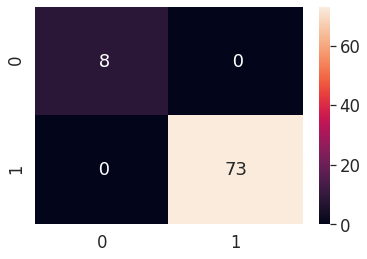

In [ ]:
print('roc auc score: gmm_preds')
gmm_preds = gmm_results['gmm_preds']
actual = gmm_results['is_known']
print(roc_auc_score(actual, gmm_preds))
print(classification_report(actual, gmm_preds))
sns.heatmap(confusion_matrix(actual, gmm_preds),annot = True,fmt = '2.0f')
plt.show()

In [ ]:
print('False Positive Actual Image Types for OC SVM: ')
print(svm_if_results[svm_if_results['oc_svm_preds']>svm_if_results['is_known']]['image_type'].value_counts())

False Positive Actual Image Types for OC SVM: 
test    1
Name: image_type, dtype: int64


FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


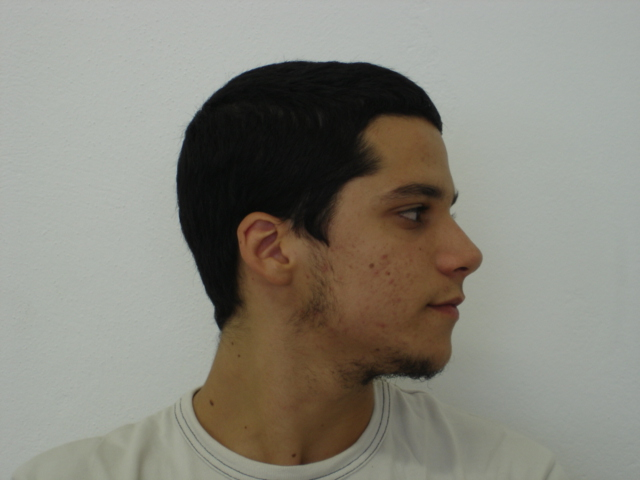

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


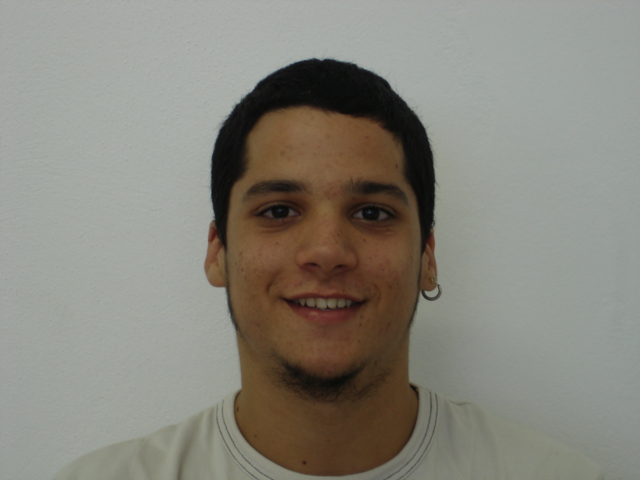

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


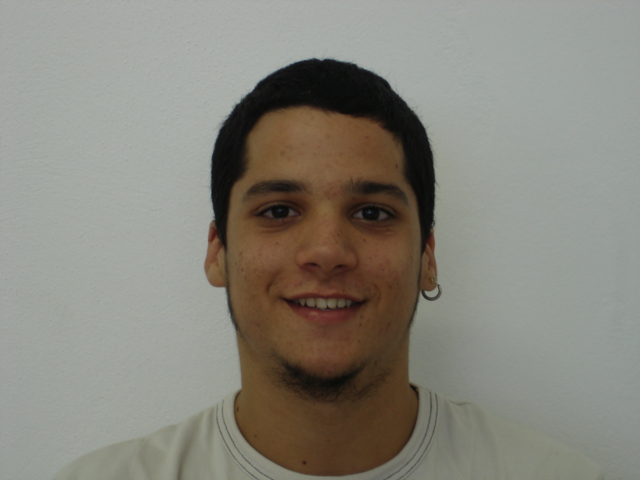

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


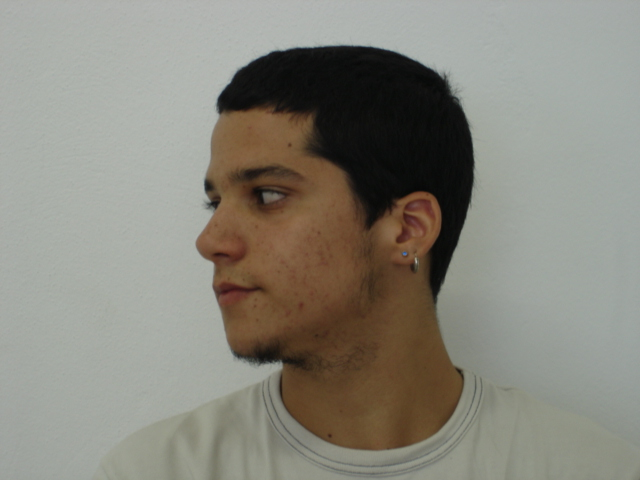

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


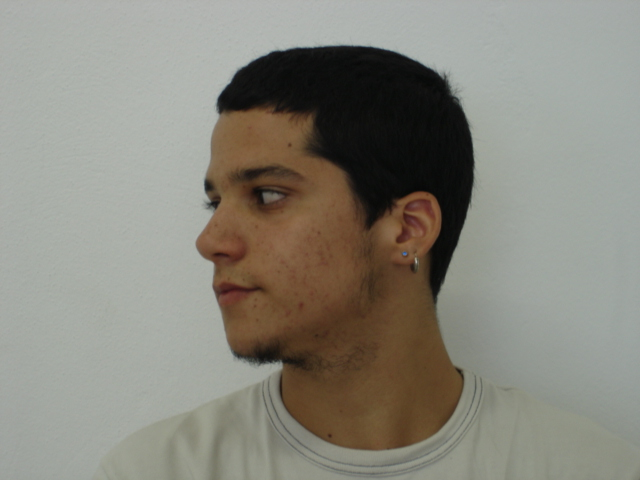

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


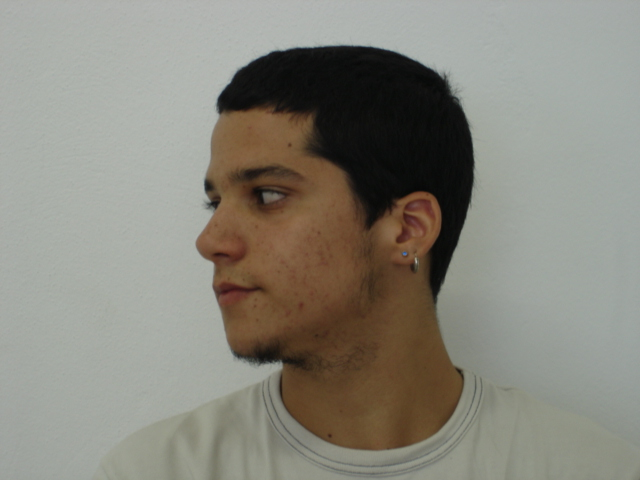

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


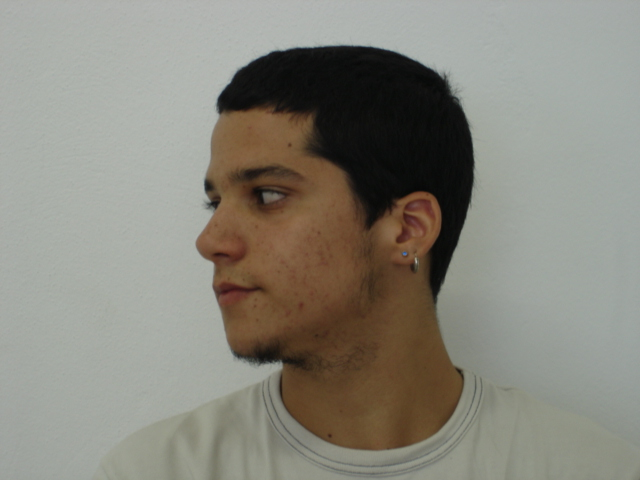

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


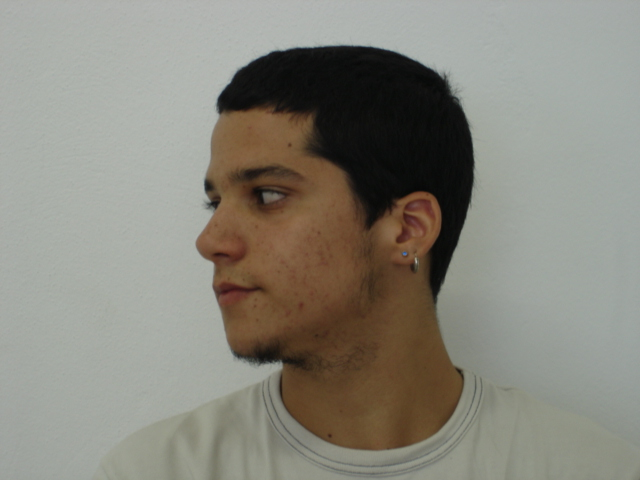

FALSE POSITIVE
oc_svm_preds: 1 | actual: 0


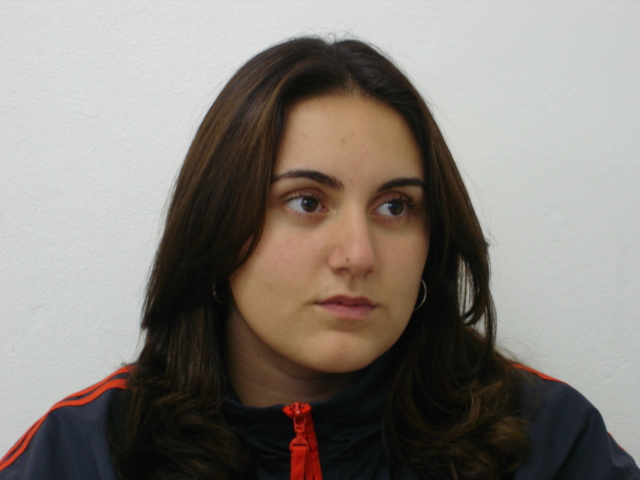

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


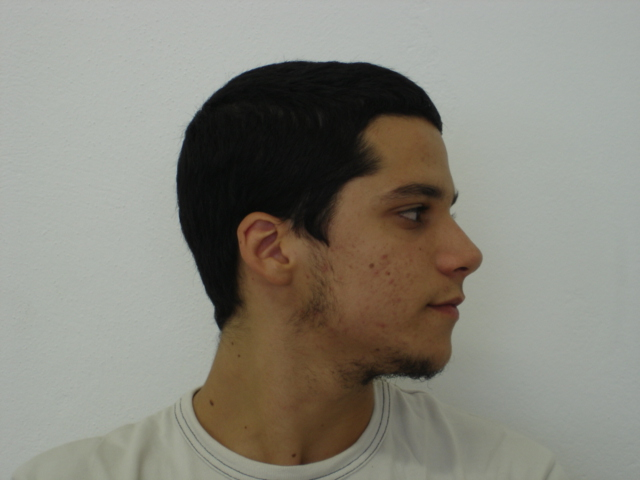

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


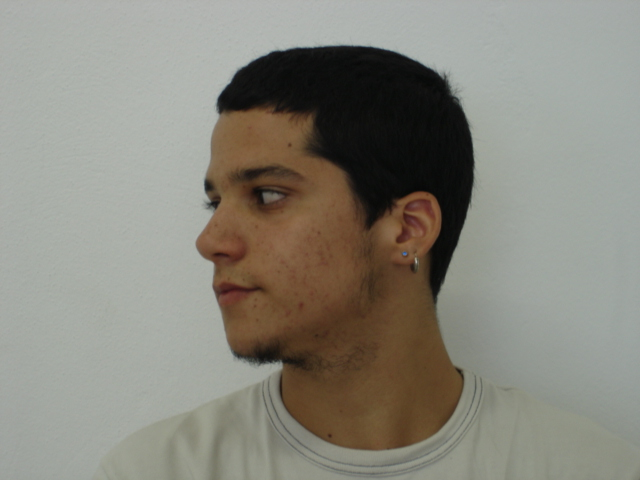

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


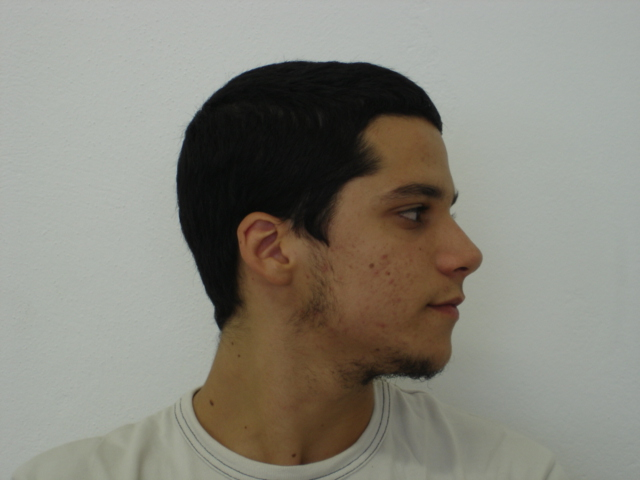

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


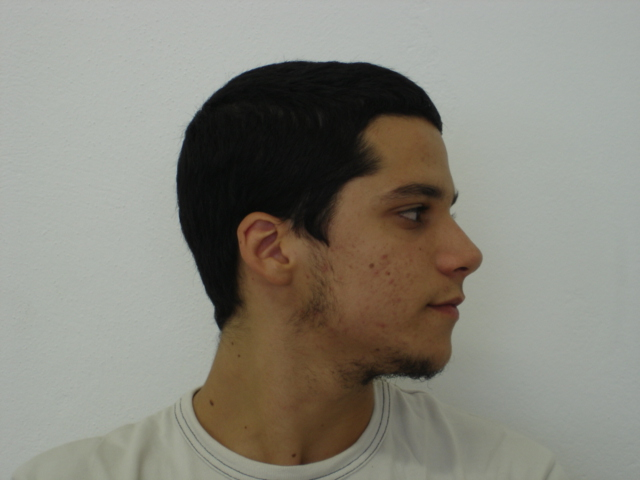

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


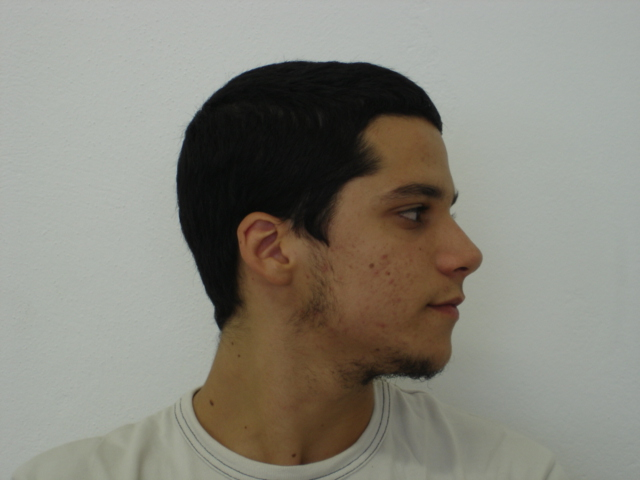

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


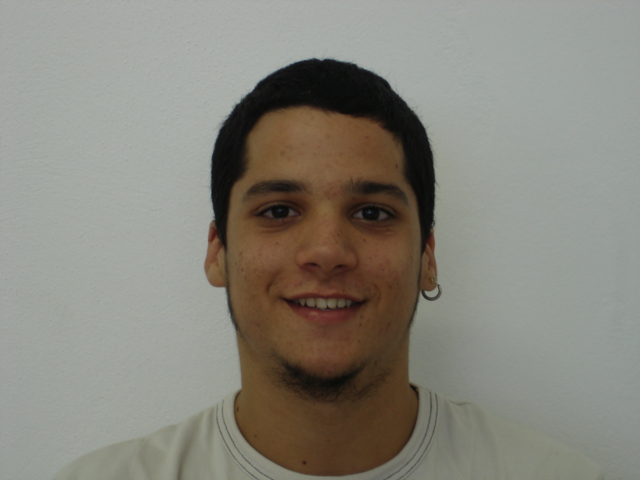

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


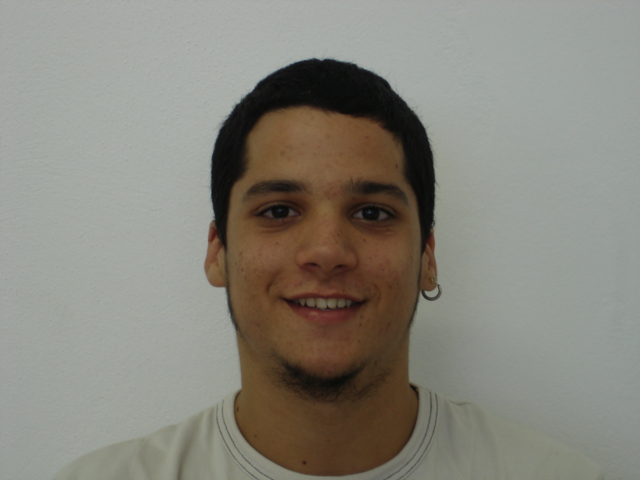

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


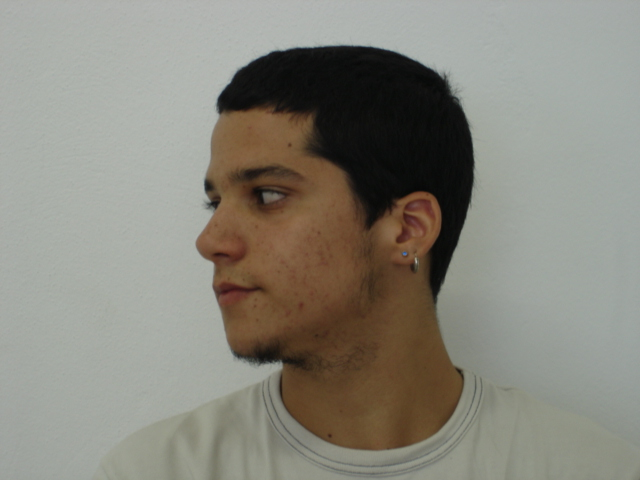

FALSE NEGATIVE
oc_svm_preds: 0 | actual: 1


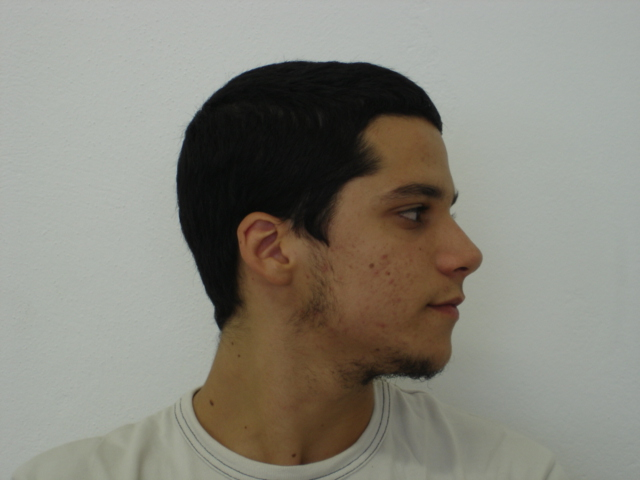

In [ ]:
from IPython.display import Image 
from IPython import display 

for index, row in svm_if_results[svm_if_results['oc_svm_preds']!=svm_if_results['is_known']].head(25).iterrows():
    if row['oc_svm_preds']==1:
        print('FALSE POSITIVE')
        print('oc_svm_preds: ' + str(row['oc_svm_preds']) + ' | actual: '+ str(row['is_known']))
        display.display(Image(row['path']))
    else:
        print('FALSE NEGATIVE')
        print('oc_svm_preds: ' + str(row['oc_svm_preds']) + ' | actual: '+ str(row['is_known']))
        img=Image(row['path'])
        display.display(img)
       

     |████████████████████████████████| 61kB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 5.8MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=40fdff3c885ebe38404e38eb7a4950f02caaad7b61949a7a1016211256f413d1
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facenet_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1
To: /root/.deepface/weights/facenet_weights.h5
92.2MB [00:00, 236MB/s]


Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 28.8MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:03, 142MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:06, 86.3MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:04, 104MB/s]
Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


39  years old  white   angry   Man


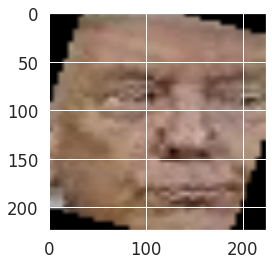

In [ ]:
######################deepface
import cv2
! pip install deepface
from deepface import DeepFace
from deepface.commons import functions

import matplotlib.pyplot as plt

models = ['Facenet', 'OpenFace', 'DeepFace', 'DeepID', 'ArcFace']
model = DeepFace.build_model(models[0])
target_size = model.layers[0].input_shape
model.summary()

img = cv2.imread("/content/drive/MyDrive/data/trump/im(9).jpg")
image_face = DeepFace.detectFace(img)
plt.imshow(image_face)

img1_path = "/content/drive/MyDrive/data/trump/im(1).jpg"
img2_path = "/content/drive/MyDrive/conventional_classification/trainings_set/adhoc_staff/1-02.jpg"


from deepface import DeepFace
obj = DeepFace.analyze(img_path =img1_path, actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])
#find vector embeddings
#detect and align 
